<a href="https://colab.research.google.com/github/Arifulhaque-02128/ML_Projects/blob/main/medical_specialist_classification_using_bilstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattion/Specialist Classification.csv")

In [4]:
df.head()

,Patient ID,Gender,Problem,Specialist
0,NaN,NaN,NaN,NaN
1,1.0,মহিলা,আমার তিন দিন যাবত অনেক মাথা ব্যথা,Medicine
2,2.0,পুরুষ,আমার প্রায় এক সপ্তাহ ধরে রোদে গেলেই মাথা ধরে য...,Medicine
3,3.0,মহিলা,আমার বোনের কয়েকদিন ধরে চোখ আর মাথা ব্যথা,Medicine
4,4.0,মহিলা,আমার মায়ের কপালের দুই দিকে অনেক ব্যথা করে আর ন...,Medicine


In [5]:
df.isnull().sum()

Patient ID    1
Gender        1
Problem       1
Specialist    1
dtype: int64

In [6]:
new_df = df.dropna()

In [7]:
new_df.isnull().sum()

Patient ID    0
Gender        0
Problem       0
Specialist    0
dtype: int64

In [8]:
new_df.head()

,Patient ID,Gender,Problem,Specialist
1,1.0,মহিলা,আমার তিন দিন যাবত অনেক মাথা ব্যথা,Medicine
2,2.0,পুরুষ,আমার প্রায় এক সপ্তাহ ধরে রোদে গেলেই মাথা ধরে য...,Medicine
3,3.0,মহিলা,আমার বোনের কয়েকদিন ধরে চোখ আর মাথা ব্যথা,Medicine
4,4.0,মহিলা,আমার মায়ের কপালের দুই দিকে অনেক ব্যথা করে আর ন...,Medicine
5,5.0,পুরুষ,আমার অনেক মাথা ব্যথা করে,Medicine


In [9]:
new_df['Specialist'].value_counts()

Specialist
Medicine           278
Ophthalmologist     71
Gynecologist        59
Surgery             58
Orthopedic          48
Cardiologist        42
Skin                38
Dentist             37
ENT                 27
Name: count, dtype: int64

In [10]:
new_df['Gender'].value_counts()

Gender
মহিলা    370
পুরুষ    288
Name: count, dtype: int64

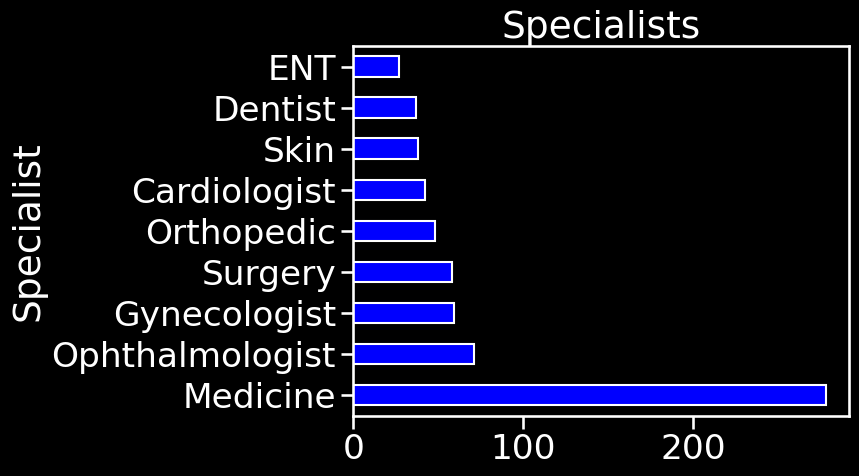

In [11]:
sns.set(style="ticks", context="talk", font_scale=1.5)
plt.style.use("dark_background")
new_df["Specialist"].value_counts().plot.barh(color='blue', title='Specialists',);

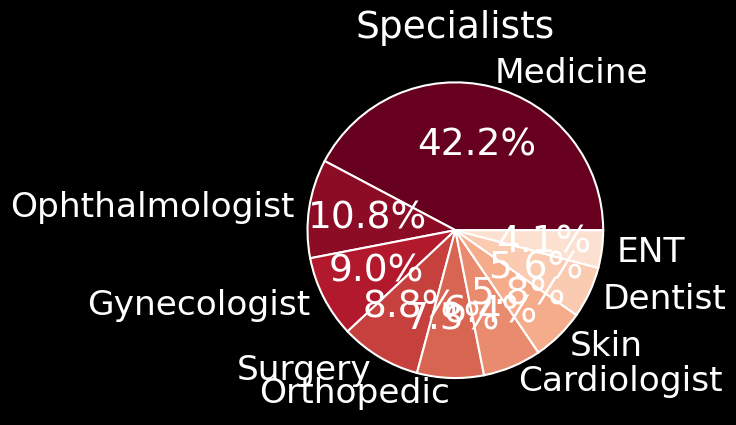

In [12]:
color = plt.cm.RdBu(np.linspace(0,1,20))
new_df["Specialist"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="Gender",colors=color,autopct="%0.1f%%")
plt.title("Specialists")
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2478 (\N{BENGALI LETTER MA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Matplotlib currently does not support Bengali natively.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2489 (\N{BENGALI LETTER HA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2495 (\N{BENGALI VOWEL SIGN I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 2494 (\N{BENGALI VOWEL SIGN AA}) missing from current font.
  func(*args, **kwargs)
/us

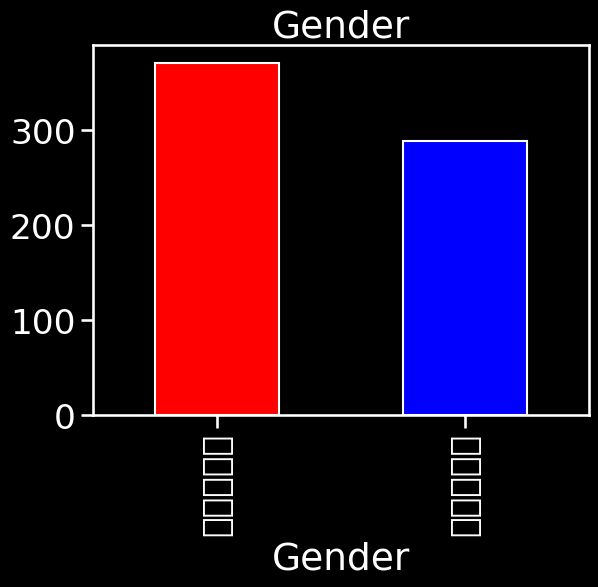

In [13]:
new_df["Gender"].value_counts().nlargest(4).plot.bar(color=['red','blue'], title='Gender');

In [14]:
den = new_df[(new_df['Specialist']=='Dentist')].reset_index(drop=True)
den.head()

,Patient ID,Gender,Problem,Specialist
0,20.0,পুরুষ,আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে ...,Dentist
1,21.0,পুরুষ,আমার দাঁত ভেঙ্গে যাচ্ছে,Dentist
2,22.0,মহিলা,আমার মাড়ি অনেক ব্যথা আর ব্রাশ করার সময় রক্ত পর...,Dentist
3,23.0,মহিলা,আমার দাঁতে কালো দাগ হচ্ছে কোনোভাবেই দাগ যাচ্ছে...,Dentist
4,24.0,পুরুষ,আমি দাঁতে জোর পাচ্ছি না।,Dentist


In [15]:
den["Gender"].value_counts()

Gender
পুরুষ    21
মহিলা    16
Name: count, dtype: int64

In [16]:
surg = new_df[(new_df['Specialist']=='Surgery')].reset_index(drop=True)
surg.head()

,Patient ID,Gender,Problem,Specialist
0,11.0,মহিলা,আমার মুখে অনেক বড় ফোঁড়ার মত উঠে আর লাল হয়ে থাক...,Surgery
1,96.0,মহিলা,আমার স্তনে প্রচন্ড ব্যথা করে। প্রায় এক মাস ধরে...,Surgery
2,97.0,মহিলা,আমার নিপল অনেক চুল্কায় এবং সাদা ময়লার মত বের হয়।,Surgery
3,98.0,মহিলা,নিপল অনেক ব্যথা করে আর ফুলে গিয়েছে আর চাপ দিলে...,Surgery
4,99.0,মহিলা,আমার নিপলে লাল গোটার মত বের হয়েছে এবং লাল হয়ে ...,Surgery


In [17]:
surg["Gender"].value_counts()

Gender
মহিলা    44
পুরুষ    14
Name: count, dtype: int64

In [18]:
ski = new_df[(new_df['Specialist']=='Skin')].reset_index(drop=True)
ski.head()

,Patient ID,Gender,Problem,Specialist
0,9.0,পুরুষ,আমার কপালে গোটার মত বের হয়েছে,Skin
1,10.0,পুরুষ,আমার অনেক ব্রণ হয় মুখে। আর অনেক ব্যথা করে।,Skin
2,12.0,পুরুষ,আমার মুখে গোটা উঠে মুখে কালো দাগ পরে যাচ্ছে।,Skin
3,13.0,মহিলা,আমার নাকে আর থুতনিতে সাদা বিচির মত উঠে আর মুখ ...,Skin
4,55.0,মহিলা,আমি ধুলায় গেলে আমার স্কিন অনেক চুল্কায় আর ফুলে...,Skin


In [19]:
ski["Gender"].value_counts()

Gender
মহিলা    23
পুরুষ    15
Name: count, dtype: int64

In [20]:
# data1 = pd.read_excel('/content/gdrive/MyDrive/NLP/Project/stopwords_bangla.xlsx')
data1 = pd.read_excel('/content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattion/stopwords_bangla.xlsx')
stopwords = data1['words'].tolist()

In [21]:
import re,nltk,json

In [22]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out



In [23]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stopwords]

    out=' '.join(stm)

    return str(out)

In [24]:
new_df['cleaned_problem'] = new_df['Problem'].apply(preprocessing)
new_df['cleaned_problem'] = new_df['cleaned_problem'].apply(stopwordRemoval)

# print some cleaned reviews from the dataset
sample_data = [20,50,100,200,300,350,400,450,500,600]
for i in sample_data:
  print('Original: ', new_df.Problem[i],'\nCleaned:',
           new_df.cleaned_problem[i],'\n','Category:-- ', new_df.Specialist[i],'\n')

Original:  আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে। 
Cleaned: দাঁত শিরশির ঠান্ডা গরম খেতে না অস্বস্তি লাগে 
 Category:--  Dentist 

Original:  আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে। 
Cleaned: মাথা ব্যথা চোখে প্রেসার পরছে 
 Category:--  Ophthalmologist 

Original:  আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না। 
Cleaned: স্তনের নিপল দুধের সাদা রস প্রেগন্যান্ট না 
 Category:--  Surgery 

Original:  আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না 
Cleaned: পায়ে পানি আসছে ঠিকমত হাঁটতে পারছি না 
 Category:--  Medicine 

Original:  আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে। 
Cleaned: মাথা ব্যথা চোখে প্রেসার পরছে 
 Category:--  Ophthalmologist 

Original:  আমার ছেলের রাতের বেলা জ্বর আসে। 
Cleaned: ছেলের রাতের বেলা জ্বর 
 Category:--  Medicine 

Original:  আমার পায়ের আঙ্গুল ফুলে আছে আর প্রচুর ব্যথা করছে। 
Cleaned: পায়ের আঙ্গুল ফুলে প্রচুর ব্যথা 
 Category

<ipython-input-24-03ea5795bc4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_problem'] = new_df['Problem'].apply(preprocessing)
<ipython-input-24-03ea5795bc4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cleaned_problem'] = new_df['cleaned_problem'].apply(stopwordRemoval)


In [25]:
def data_summary(dataset):

    """
    This function will print the summary of the problems and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(new_df.cleaned_problem) for word in t.strip().split()]
    class_label= [k for k,v in new_df.Specialist.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(new_df[new_df.Specialist==label].cleaned_problem) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(new_df[new_df.Specialist==label].cleaned_problem)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(new_df[new_df.Specialist==label].cleaned_problem))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(new_df)


Class Name :  Medicine
Number of Documents:278
Number of Words:1595
Number of Unique Words:399
Most Frequent Words:

ব্যথা	98
না	73
লাগে	45
মাথা	39
ঠিকমত	36
ঘুম	33
যায়	31
বমি	28
জ্বর	23
সাথে	21

Class Name :  Ophthalmologist
Number of Documents:71
Number of Words:376
Number of Unique Words:115
Most Frequent Words:

চোখ	36
না	20
ব্যথা	19
চোখে	16
পানি	11
ঠিকমত	11
দেখি	9
চোখের	9
ঝাপ্সা	7
চুল্কায়	7

Class Name :  Gynecologist
Number of Documents:59
Number of Words:389
Number of Unique Words:136
Most Frequent Words:

ব্যথা	25
পিরিয়ড	21
না	16
পিরিয়ডের	14
সাদা	13
সময়	12
পেট	11
মেয়ের	11
আম্মুর	9
স্তনে	8

Class Name :  Surgery
Number of Documents:58
Number of Words:336
Number of Unique Words:97
Most Frequent Words:

ব্যথা	27
ফুলে	16
আস্তে	12
বড়	11
স্তন	11
মেয়ের	11
পুঁজ	9
এগুলো	8
স্তনে	8
নিপল	8

Class Name :  Orthopedic
Number of Documents:48
Number of Words:307
Number of Unique Words:98
Most Frequent Words:

ব্যথা	42
না	25
হাত	10
পায়ের	9
মাজা	9
পারছে	9
হাঁটুতে	8
পায়ে	8
নাড়াতে	7
প্রচন্ড	7

Clas

<ipython-input-26-04e7bfc8576b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(class_names, rotation=45);


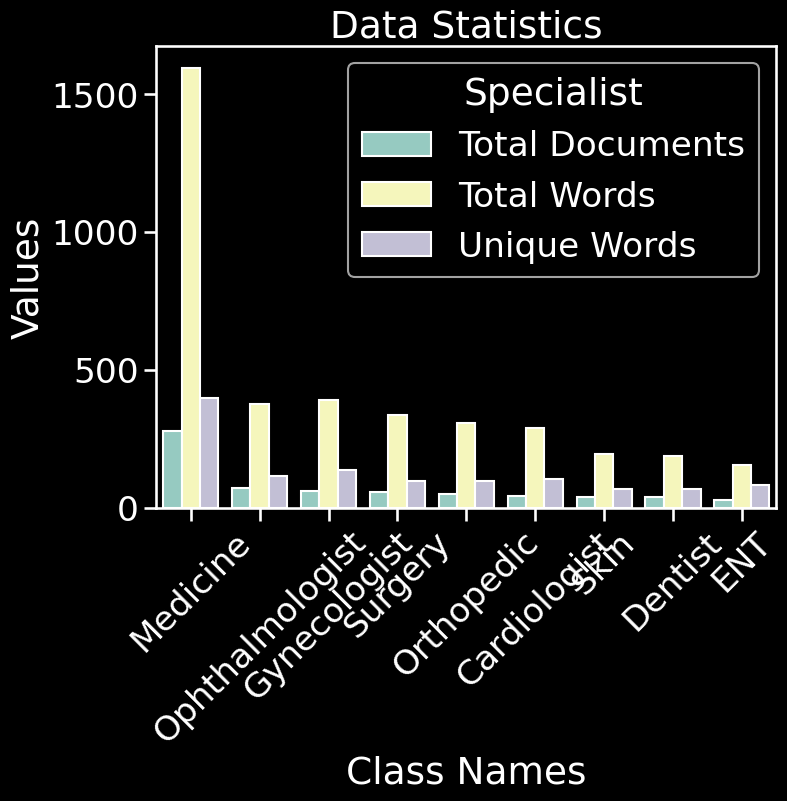

In [26]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Specialist", value_name="Values")
plt.figure(figsize=(8, 6))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Specialist')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

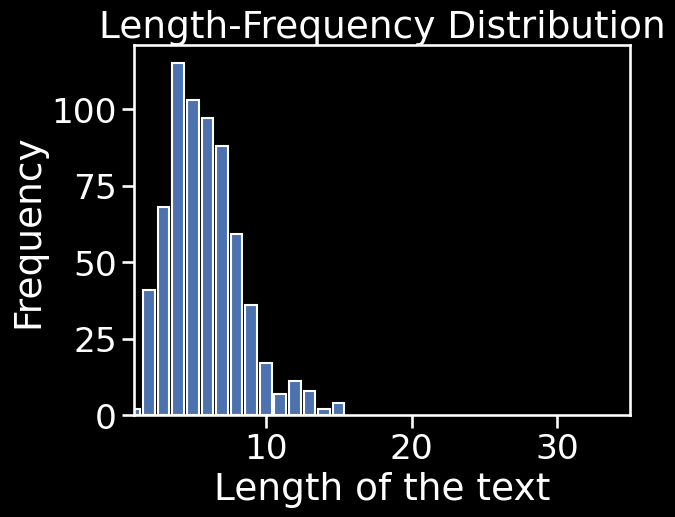

Maximum Length of a text: 15
Minimum Length of a text: 1
Average Length of a text: 6.0


In [27]:
# Calculate the Review of each of the Review
new_df['textLength'] = new_df.cleaned_problem.apply(lambda x:len(x.split()))
frequency = dict()
for i in new_df.textLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 35)
# in this notbook color is not working but it should work.
plt.xlabel('Length of the text')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a text: {max(new_df.textLength)}")
print(f"Minimum Length of a text: {min(new_df.textLength)}")
print(f"Average Length of a text: {round(np.mean(new_df.textLength),0)}")

In [28]:
# segregating dataframe for analyzing individual problem
df_med = new_df[new_df['Specialist'] == 'Medicine']
df_ophtha = new_df[new_df['Specialist'] == 'Ophthalmologist']
df_gyne = new_df[new_df['Specialist'] == 'Gynecologist']
df_surg = new_df[new_df['Specialist'] == 'Surgery']

df_ortho = new_df[new_df['Specialist'] == 'Orthopedic']
df_cardio = new_df[new_df['Specialist'] == 'Cardiologist']
df_skin = new_df[new_df['Specialist'] == 'Skin']
df_dent = new_df[new_df['Specialist'] == 'Dentist']
df_ent = new_df[new_df['Specialist'] == 'ENT']

In [29]:
!pip install wordcloud
!pip install bnlp_toolkit
!pip install python-bidi
from bidi.algorithm import get_display

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.3 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=ee60109b437bb179c0d0b0046bf8b7a0979c6bd8bc2073e5f02a682f2aabcfd0
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: sentencepiece
    Found existing installation: sentencepiece 0.1.99
    Uninstalling sentencepiece-0.1.99:
      Successfully uninstalled sentencepiece-0.1.99
  Attempting u

Text(0.5, 1.0, 'Word cloud for Medicine')

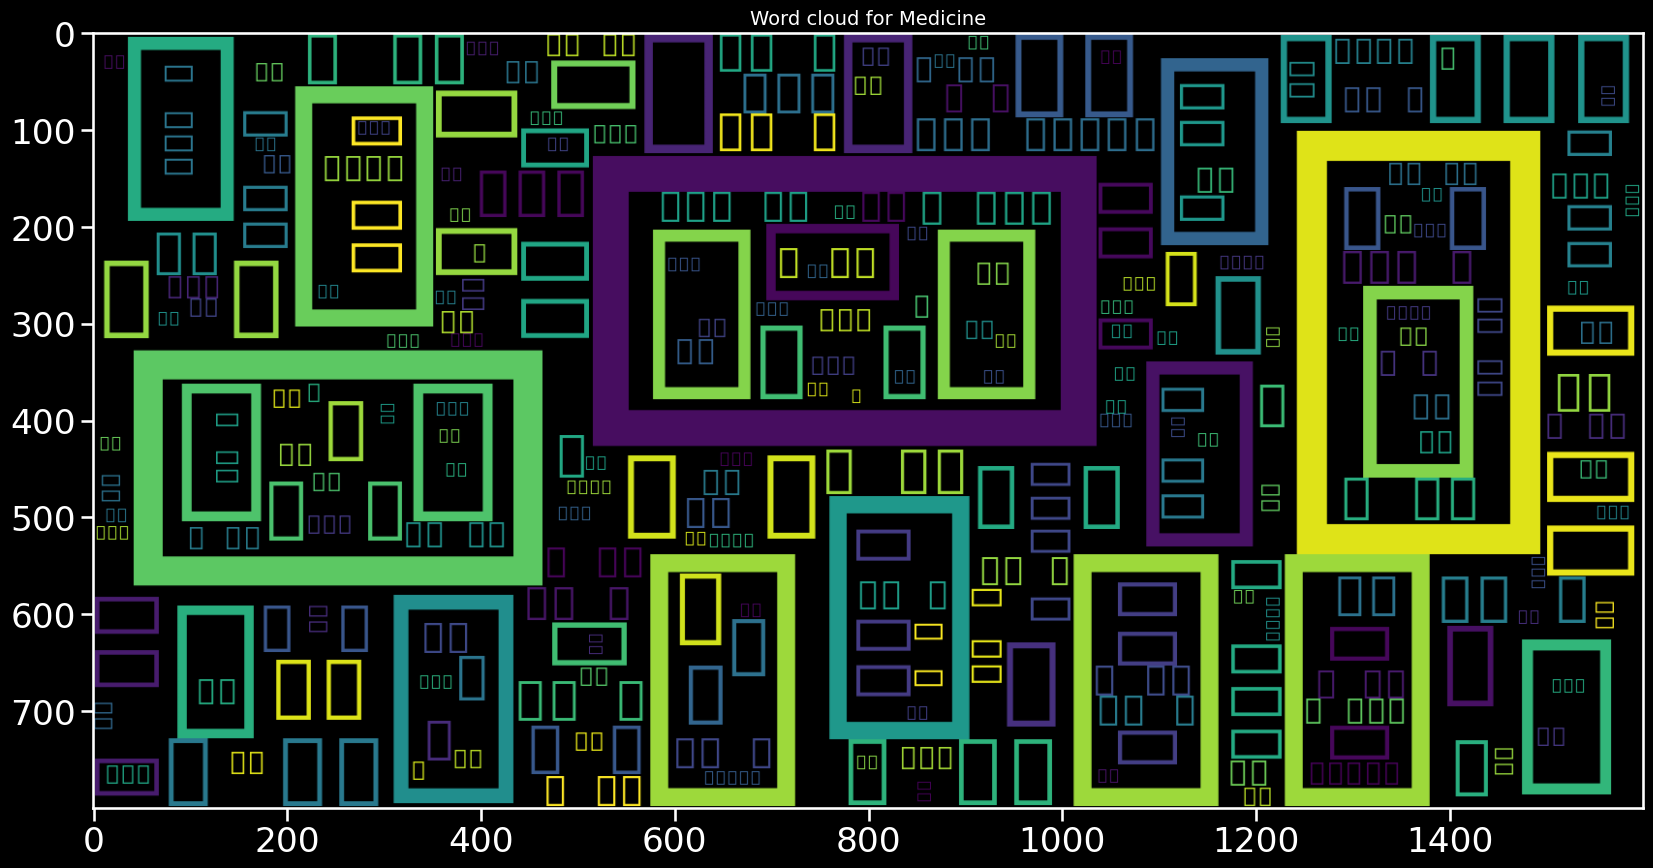

In [30]:
from wordcloud import WordCloud


plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 500, width = 1600, height = 800).generate(' '.join(df_med.cleaned_problem))
plt.imshow(wc, interpolation = 'bilinear')
plt.title('Word cloud for Medicine', fontsize = 14)

In [31]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
def label_encoding(specialist,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        specialist: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(specialist)
    encoded_labels = le.transform(specialist)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->", le.classes_)
        # print("\n\t\t\t===== Labels =====",labels)
        # for i in sample_data:
        #     print(specialist[i],' ', encoded_labels[i],'\n')

    return labels, le

In [33]:
def dataset_split(feature,specialist):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature:
        specialist: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X,X_test,y,y_test = train_test_split(feature,specialist,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)


    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",len(feature),
        "\n\tTraining\t\t",len(X_train),
        "\n\tTest\t\t\t",len(X_test),
        "\n\tValidation\t\t",len(X_valid))

    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [34]:
labels, label_encoder = label_encoding(new_df.Specialist, False)

In [35]:
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(new_df.cleaned_problem, labels)


Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 658 
	Training		 420 
	Test			 132 
	Validation		 106


In [36]:
#Tokenization
vocab_size = 3000
embedding_dim = 64
max_length = 15
trunc_type='post'
padding_type='post'
oov_tok = ""

def padded_problems(original,encoded,padded):
  '''
  print the samples padded problems
  '''
  print("\n\t\t\t====== Encoded Sequences ======","\n")
  print(original,"\n",encoded)
  print("\n\t\t\t====== Paded Sequences ======\n",original,"\n",padded)


In [37]:
# Train Data Tokenization
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

In [38]:
#============================== Tokenizer Info =================================
(word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
def tokenizer_info(mylist,bool):
  ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
  for w,c in ordered[:10]:
    print(w,"\t",c)
  #=============================== Print all the information =========================
print("\t\t\t====== Tokenizer Info ======")
print("Words --> Counts:")
tokenizer_info(word_counts,bool =True )
print("\nWords --> Documents:")
tokenizer_info(word_docs,bool =True )
print("\nWords --> Index:")
tokenizer_info(word_index,bool =True )
print("\nTotal Documents -->",document_count)
print(f"Found {len(word_index)} unique tokens")

			====== Tokenizer Info ======
Words --> Counts:
ব্যথা 	 176
না 	 106
লাগে 	 35
মেয়ের 	 34
ঠিকমত 	 33
ফুলে 	 31
বুকে 	 28
যায় 	 28
মায়ের 	 27
মাথা 	 26

Words --> Documents:
ব্যথা 	 156
না 	 97
মেয়ের 	 34
ঠিকমত 	 31
লাগে 	 31
ফুলে 	 31
মায়ের 	 27
বুকে 	 26
যায় 	 26
মাথা 	 26

Words --> Index:
খারাপ 	 538
ডায়বেটিস 	 537
টনটন 	 536
প্রস্রাবও 	 535
হলুদ 	 534
পিপাসা 	 533
তরলের 	 532
বাড়তে 	 531
করাবে 	 530
এটার 	 529

Total Documents --> 420
Found 538 unique tokens


In [39]:
padded_problems(X_train[10],train_sequences[10],train_padded[10])


			====== Encoded Sequences ====== 

ব্রণ মুখে ব্যথা 
 [138, 23, 68, 2]

			====== Paded Sequences ======
 ব্রণ মুখে ব্যথা 
 [138  23  68   2   0   0   0   0   0   0   0   0   0   0   0]


In [40]:
# Validation Data Tokenization
validation_sequences = tokenizer.texts_to_sequences(X_valid)
validation_padded = pad_sequences(validation_sequences, padding=padding_type , maxlen=max_length)
X_valid

640    মায়ের চোখের মনির তৈলাক্ত লালচে রেখার উঠে চোখ চ...
507                                 নাতনির বাম পা ভেঙ্গে
567                            মেয়ের নিপলে গোটার চুল্কায়
79                     মাথা ঘোরায় হার্ট বিট বেড়ে যায় বমি
148                            স্তনের চারপাশে শক্ত চাকার
427         পায়খানার চাপ পায়খানা পায়খানা কশা পেটেও ব্যথা
346                        নার্ভাস লাগে ক্লান্ত লাগে ঘাম
488                   মাঝে মাঝেই বুক জ্বালা পুড়া বমি ভাব
142           বেশিক্ষন শুনলে অশান্তি লাগে মাথা ব্যথা যায়
469       বেশিক্ষন হাঁটলে পায়ের গোরালি ব্যথা দাঁড়াতেই না
57         হাতের কনুই পায়ে চুল্কায় জায়গাটা সাদা কালো দাগ
97                               নিপল চুল্কায় সাদা ময়লার
485            খালা হঠাৎ হাত পা নাড়াতে পারছে না একদম অবশ
293             মুখে রুচি পেট ব্যথার কারণে খেতে পারছি না
658    চশমা বেশিক্ষন থাকলে ঠিকমত না চশমা পরার পরপরই ঠ...
621                      ছেলের চোখের মনি ব্যথা পানি পরতে
582                    বাবা খাবার চাবাতে দাঁতে ব্যথা পায়
261                      আম্মুর

In [41]:
padded_problems(X_valid[23],validation_sequences[1],validation_padded[1])


			====== Encoded Sequences ====== 

দাঁতে কালো দাগ কোনোভাবেই দাগ না 
 [205, 125, 130, 76]

			====== Paded Sequences ======
 দাঁতে কালো দাগ কোনোভাবেই দাগ না 
 [205 125 130  76   0   0   0   0   0   0   0   0   0   0   0]


In [42]:
# Test Data Tokenization
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, padding=padding_type , maxlen=max_length)
X_test

540                                       চোখ হঠাৎ ব্যথা
104           ঠিকমত মনোযোগ না ঘুম ঠিকমত না তারাতারি ভুলে
15                                  নাক সর্দির সাথে রক্ত
447                               মুখে উঠে এগুলো চুল্কায়
464              দাদুর হার্টে দুর্বল টেনশন না অস্থির যায়
414                             মেয়ে পানি খায় মুখে অরুচি
458                                মেয়ের ঠিকমত পিরিয়ড না
368                                    মা ঘুম ভেঙ্গে যায়
407                     আব্বুর কানে ব্যথা ঠিকমত শুনতে না
486                  নাতনির বয়স এখনি সাদা স্রাব দুর্গন্ধ
76           আমারহঠাৎ প্রেসার বেড়ে যায় পানির পিপাসা লাগে
426                                ভাতিজার পাতলা পায়খানা
359                          বাবার পাতলাপায়খানা থামছে না
141                     রোদে মাথা ব্যথা কপালে ভ্রু ব্যথা
158                অল্প বিষয় অস্থির পরি প্রেসার বেড়ে যায়
450                                দূরের কষ্ট মাথা ব্যথা
302                    ঠিকমত খাওয়া দাওয়া দুর্বল লাগে চোখ
197                       মায়ের

In [43]:
padded_problems(X_test[22],test_sequences[100],test_padded[100])


			====== Encoded Sequences ====== 

মাড়ি ব্যথা ব্রাশ সময় রক্ত ব্যথা 
 [12, 42, 4, 6, 135, 3]

			====== Paded Sequences ======
 মাড়ি ব্যথা ব্রাশ সময় রক্ত ব্যথা 
 [ 12  42   4   6 135   3   0   0   0   0   0   0   0   0   0]


In [44]:
train_label_seq = y_train
valid_label_seq = y_valid
testing_label_seq = y_test

In [45]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU, Bidirectional
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

In [46]:
# dataset path
path = '/content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattion'


In [47]:
keras.backend.clear_session()
accuracy_threshold = 0.98
vocab_size = 3000
embedding_dim = 64
max_length = 15
num_category = 9

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
# Saved the Best Model
filepath = path+"Model.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
callback_list = [acc_callback, checkpoint]
# Model definition
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # Bidirectional(LSTM(32, return_sequences=True, dropout=0.2)),
    Bidirectional(LSTM(32, dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_category, activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 15, 64)            192000    
                                                                 
 bidirectional (Bidirection  (None, 64)                24832     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                1560      
                                                                 
 flatten (Flatten)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 225       
                                                                 
Total params: 218617 (853.97 KB)
Trainable params: 218617 (853.97 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [48]:
num_epochs = 50
batch = 64
history = model.fit(train_padded, train_label_seq,
                    epochs=num_epochs,
                    batch_size = batch,
                    validation_data=(validation_padded, valid_label_seq),
                    verbose=1,
                    callbacks = callback_list)


Epoch 1/50
6/7 [========================>.....] - ETA: 0s - loss: 2.1771 - accuracy: 0.3464
Epoch 1: val_accuracy improved from -inf to 0.44340, saving model to /content/gdrive/MyDrive/NLP/Project/Bengali_medical_specialist_classificattionModel.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 11s 549ms/step - loss: 2.1746 - accuracy: 0.3452 - val_loss: 2.1216 - val_accuracy: 0.4434
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 2.1042 - accuracy: 0.4095
Epoch 2: val_accuracy did not improve from 0.44340
7/7 [==============================] - 0s 53ms/step - loss: 2.1042 - accuracy: 0.4095 - val_loss: 2.0060 - val_accuracy: 0.4434
Epoch 3/50
6/7 [========================>.....] - ETA: 0s - loss: 2.0039 - accuracy: 0.3932
Epoch 3: val_accuracy did not improve from 0.44340
7/7 [==============================] - 0s 51ms/step - loss: 1.9771 - accuracy: 0.4095 - val_loss: 1.8276 - val_accuracy: 0.4434
Epoch 4/50
6/7 [========================>.....] - ETA: 0s - loss: 1.8880 - accuracy: 0.4115
Epoch 4: val_accuracy did not improve from 0.44340
7/7 [==============================] - 0s 55ms/step - loss: 1.8932 - accuracy: 0.4095 - val_loss: 1.7634 - val_accuracy: 0.4434
Epoch 5/50
6/7 [========================>.....] - ETA: 0s

5/5 [==============================] - 2s 8ms/step


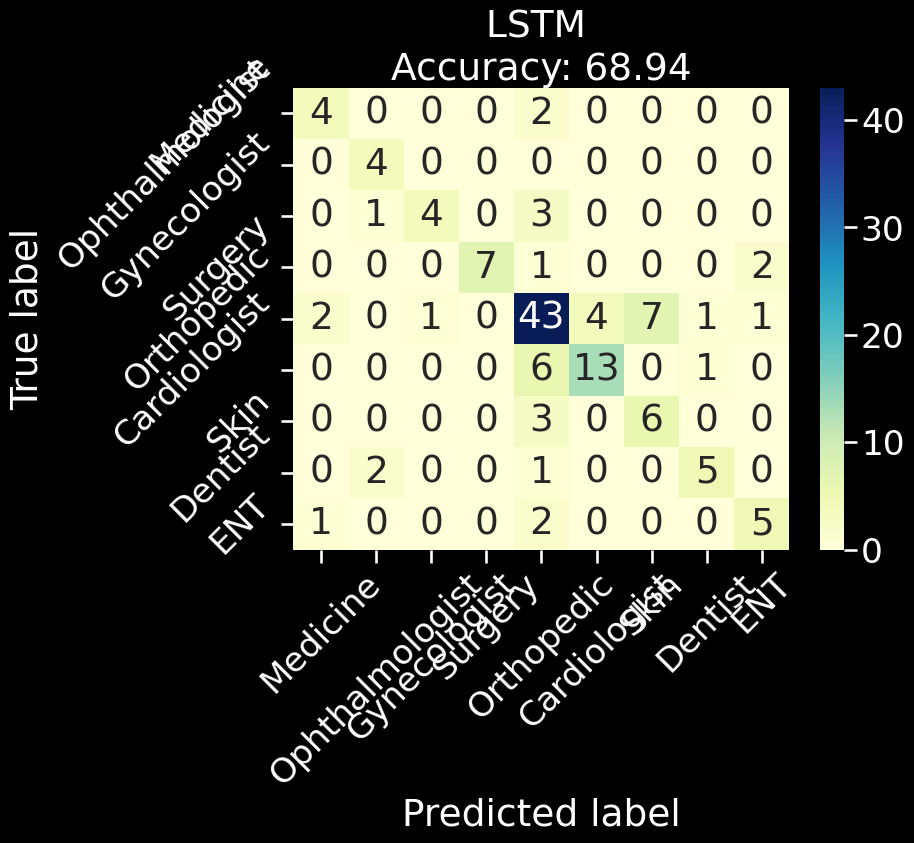

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
# load the Saved model from directory
model = load_model(path+"Model.h5")
predictions = model.predict(test_padded)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(testing_label_seq, y_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['Medicine' ,'Ophthalmologist' ,'Gynecologist', 'Surgery', 'Orthopedic', 'Cardiologist', 'Skin', 'Dentist', 'ENT'],
                     columns = ['Medicine' ,'Ophthalmologist' ,'Gynecologist', 'Surgery', 'Orthopedic', 'Cardiologist', 'Skin', 'Dentist', 'ENT'])

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu", fmt='g')
plt.title('LSTM \nAccuracy: {0:.2f}'.format(accuracy_score(testing_label_seq, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [50]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = testing_label_seq, y_pred = y_pred, output_dict=True)).transpose()
report = report.rename(index={'0': 'Medicine','1':'Ophthalmologist','2':'Gynecologist','3':'Surgery','4':'Orthopedic','5':'Cardiologist', '6':'Skin','7':'Dentist','8':'ENT'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Medicine,57.14,66.67,61.54,6.000000
Ophthalmologist,57.14,100.00,72.73,4.000000
Gynecologist,80.00,50.00,61.54,8.000000
Surgery,100.00,70.00,82.35,10.000000
Orthopedic,70.49,72.88,71.67,59.000000
Cardiologist,76.47,65.00,70.27,20.000000
Skin,46.15,66.67,54.55,9.000000
Dentist,71.43,62.50,66.67,8.000000
ENT,62.50,62.50,62.50,8.000000
accuracy,68.94,68.94,68.94,0.689394


In [51]:
# manual prediction
sample_text = ["আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে।", "আমার নাতনির ঠিকমত পিরিয়ড হচ্ছে না। আর অনেক সাদা স্রাব বের হয়", "আমার দূরের জিনিস দেখতে অনেক কষ্ট হয় আর তখন মাথা ব্যথা করে", "আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না", "আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না।", "আমি কাছ থেকে কিছু দেখতে গেলে অনেক মাথা ব্যথা করে মনে হয় চোখে অনেক প্রেসার পরছে।"]
sample_output = ['Dentist', 'Gynecologist', 'Ophthalmologist', 'Medicine', 'Surgery', 'Ophthalmologist' ]

# Define the class names mapping
class_names = {0: 'Medicine', 1:'Ophthalmologist', 2:'Gynecologist', 3:'Surgery', 4:'Orthopedic', 5:'Cardiologist', 6:'Skin', 7:'Dentist', 8:'ENT'}

for i, text in enumerate(sample_text) :
  cleaned_sample_txt = preprocessing(text)
  cleaned_txt = stopwordRemoval(cleaned_sample_txt)

  sample_sequences = tokenizer.texts_to_sequences([cleaned_txt])
  sample_padded = pad_sequences(sample_sequences, padding='post' , maxlen=max_length)

# Predict the class
  predicted_class_probabilities = model.predict(sample_padded)
  predicted_class_index = np.argmax(predicted_class_probabilities, axis=1)[0]

  # Map the predicted class index to the class name
  predicted_class_name = class_names[predicted_class_index]
  print(f"Problem :  '{text}' \nPredicted Class : '{predicted_class_name}'\nActual Class : '{sample_output[i]}'\n")

1/1 [==============================] - 0s 58ms/step
Problem :  'আমার দাঁত শিরশির করে। ঠান্ডা বা গরম কিছু খেতে পারি না। অনেক অস্বস্তি লাগে।' 
Predicted Class : 'Ophthalmologist'
Actual Class : 'Dentist'

1/1 [==============================] - 0s 42ms/step
Problem :  'আমার নাতনির ঠিকমত পিরিয়ড হচ্ছে না। আর অনেক সাদা স্রাব বের হয়' 
Predicted Class : 'Surgery'
Actual Class : 'Gynecologist'

1/1 [==============================] - 0s 63ms/step
Problem :  'আমার দূরের জিনিস দেখতে অনেক কষ্ট হয় আর তখন মাথা ব্যথা করে' 
Predicted Class : 'Orthopedic'
Actual Class : 'Ophthalmologist'

1/1 [==============================] - 0s 87ms/step
Problem :  'আমার পায়ে পানি আসছে। ঠিকমত হাঁটতে পারছি না' 
Predicted Class : 'Orthopedic'
Actual Class : 'Medicine'

1/1 [==============================] - 0s 37ms/step
Problem :  'আমার স্তনের নিপল দিয়ে দুধের মত সাদা রস বের হতে থাকে কিন্তু আমি প্রেগন্যান্ট না।' 
Predicted Class : 'Surgery'
Actual Class : 'Surgery'

1/1 [==============================] - 0s 35ms/step
Pr